# Convolutional Neural Networks
Load a pretrained network from TensorFlow Hub, ResNet50 - a 50 layer deep network trained to recognize 1000 objects. Starting usage:

In [58]:
# Download the images and store them

!pip install google_images_download

from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 3.ARK_6.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 4.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 5.VOYA_web_deer.jpg
Image URL: https://www.kideponationalpark.com/wp-content/uploads/2016/11/zebras-in-kidepo-750x450.jpg
Completed Image =

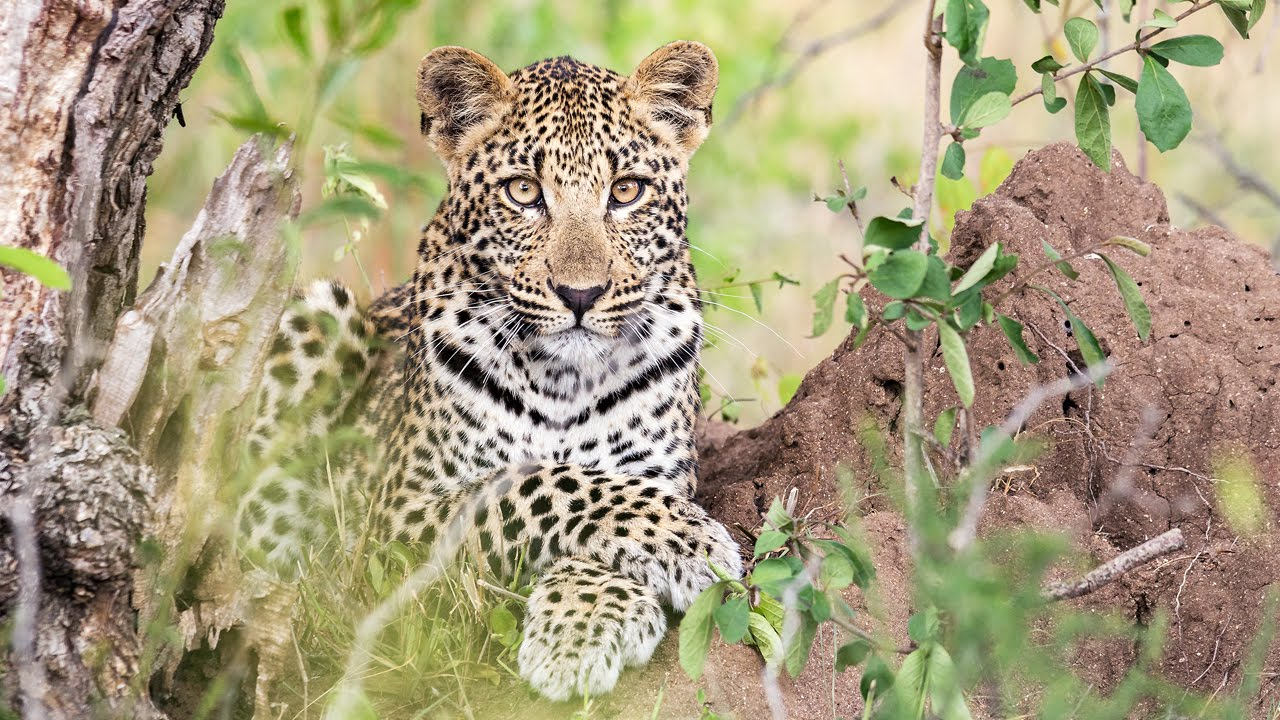

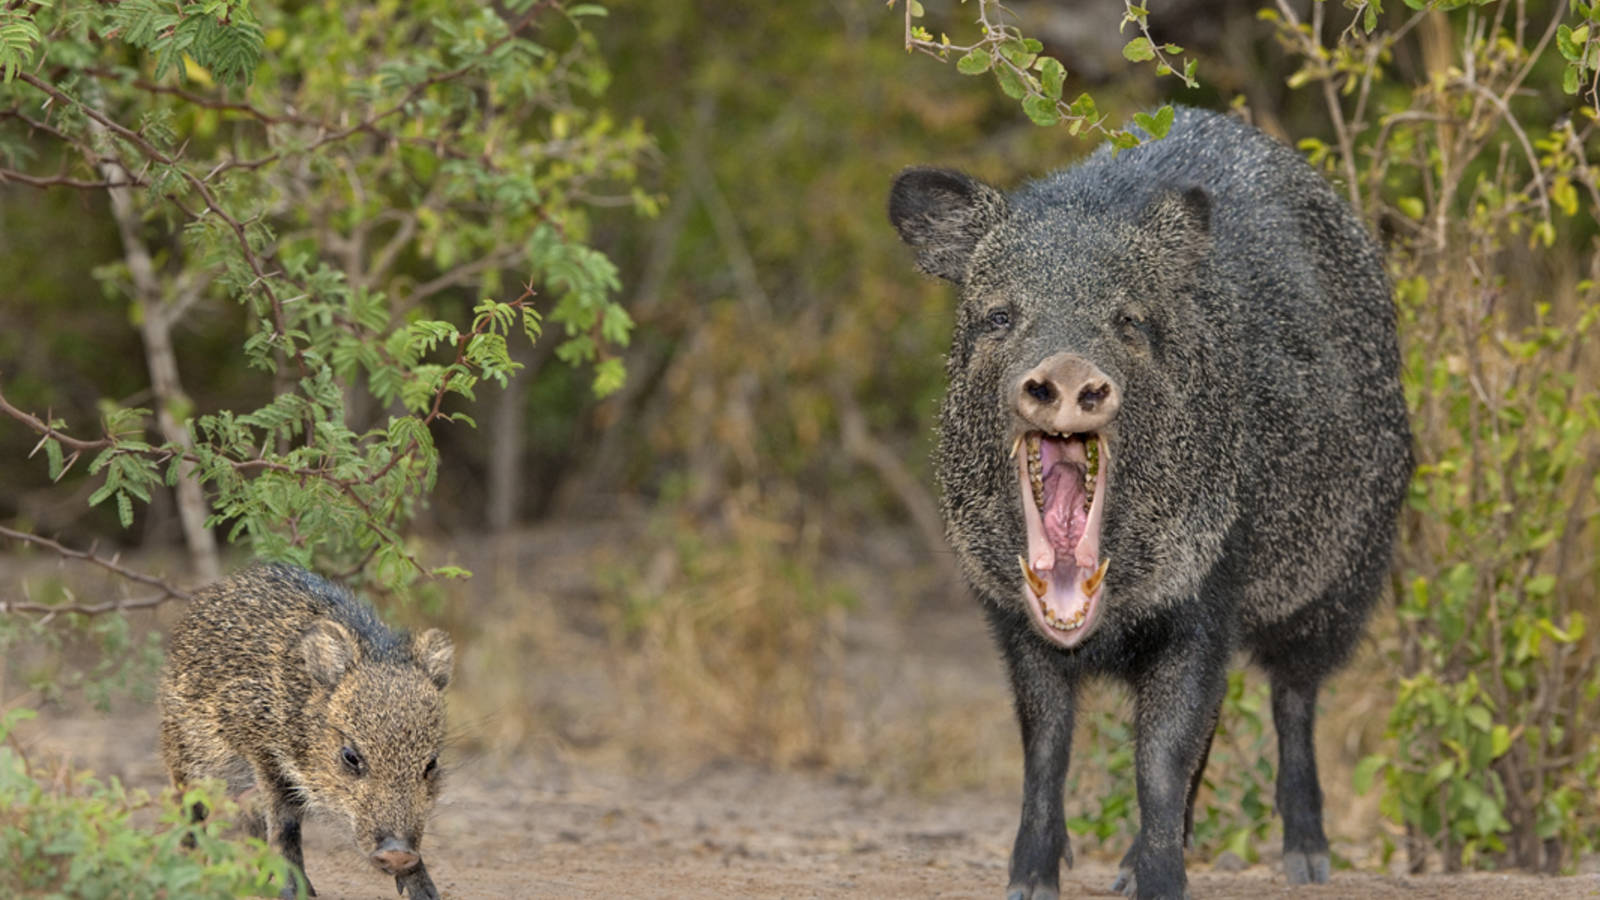

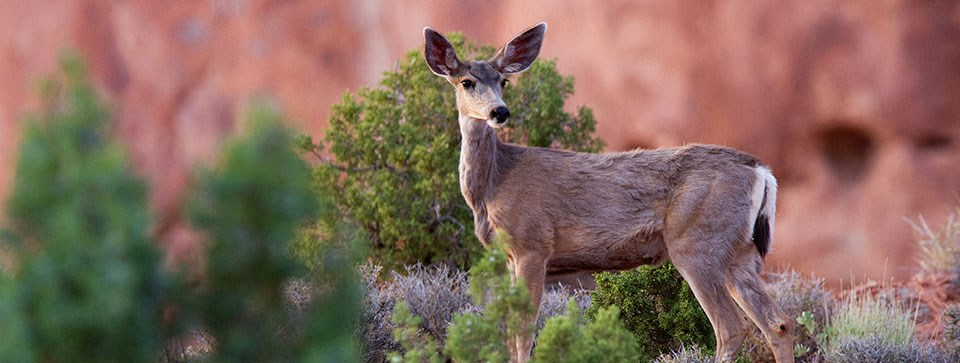

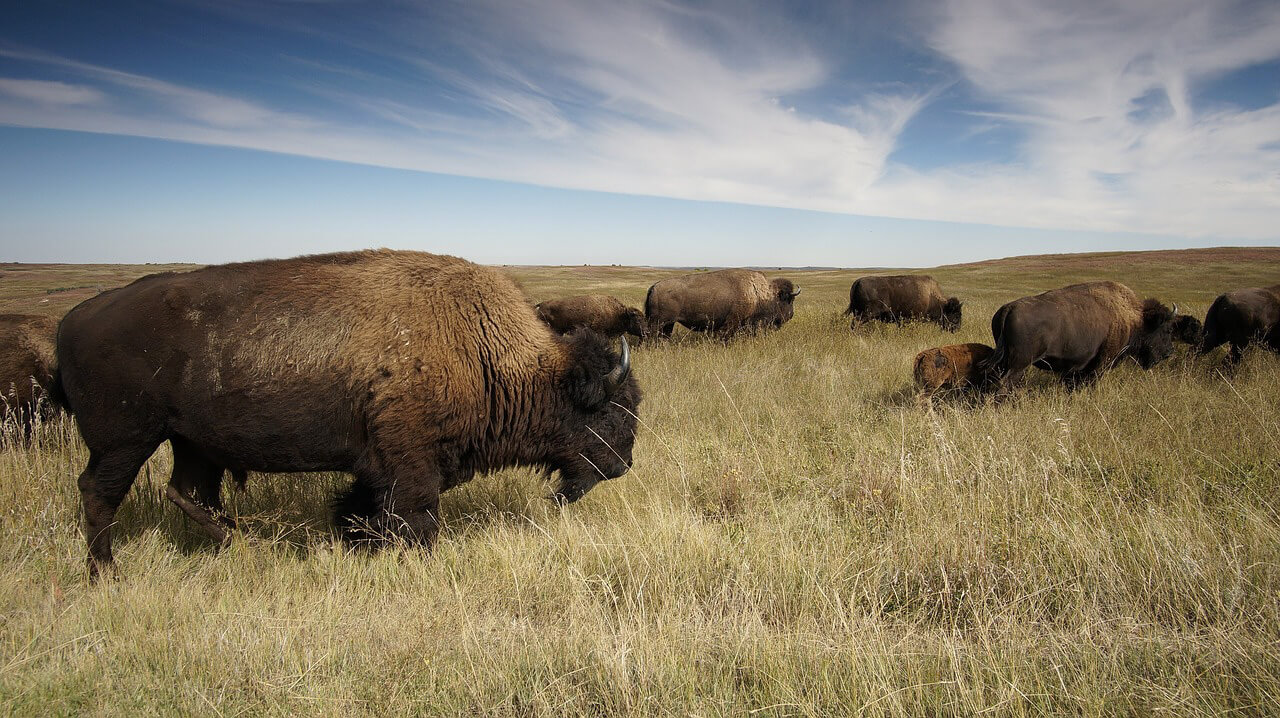

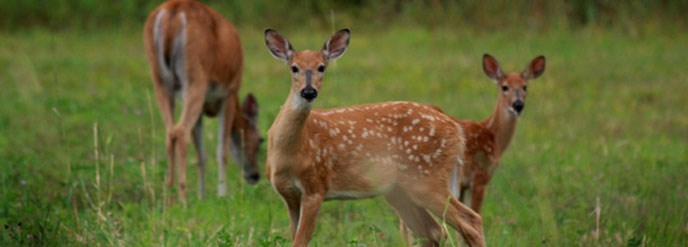

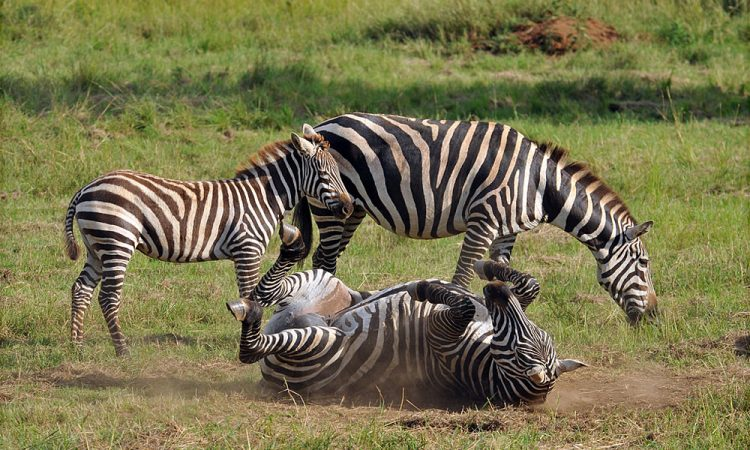

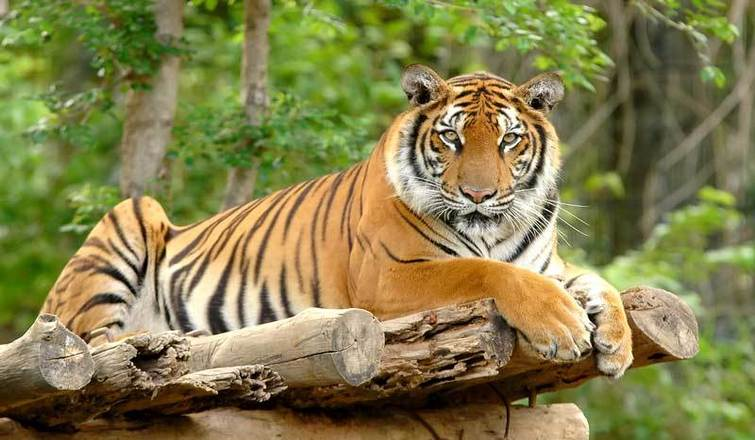

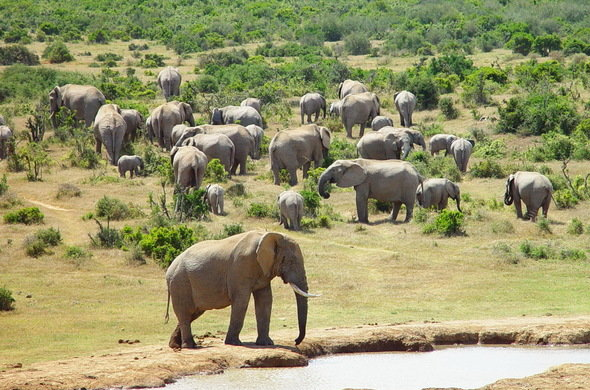

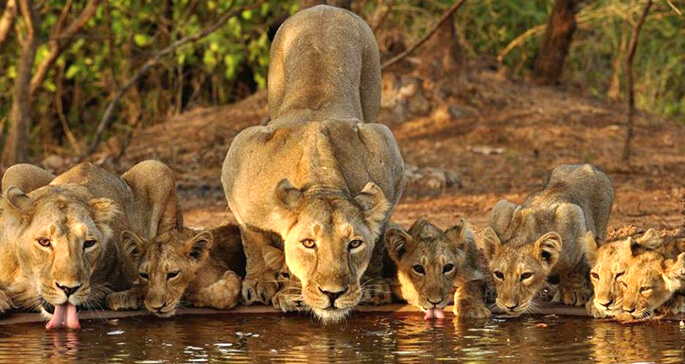

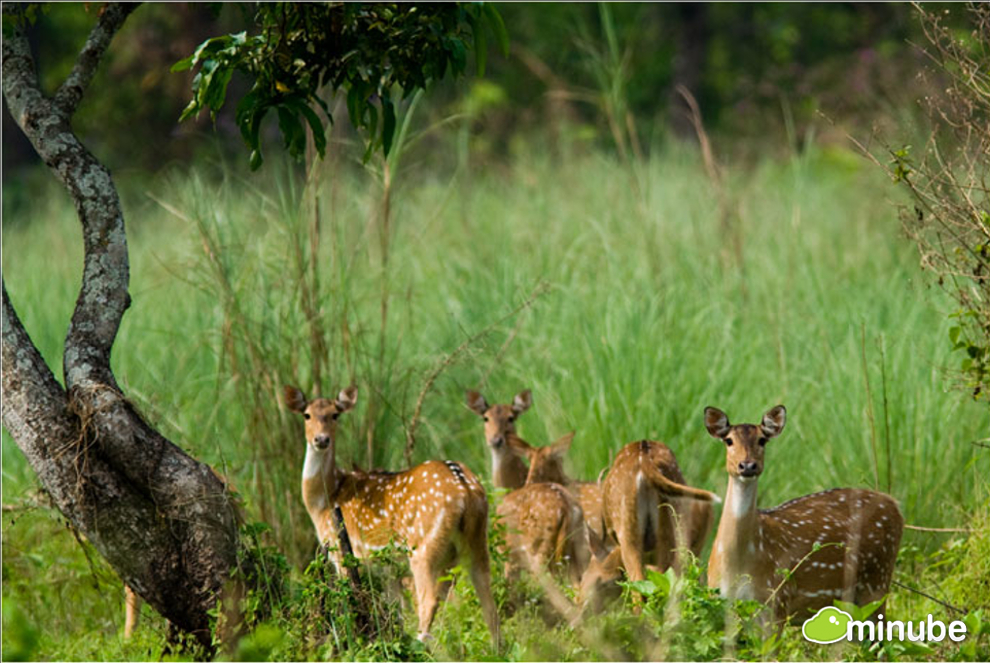

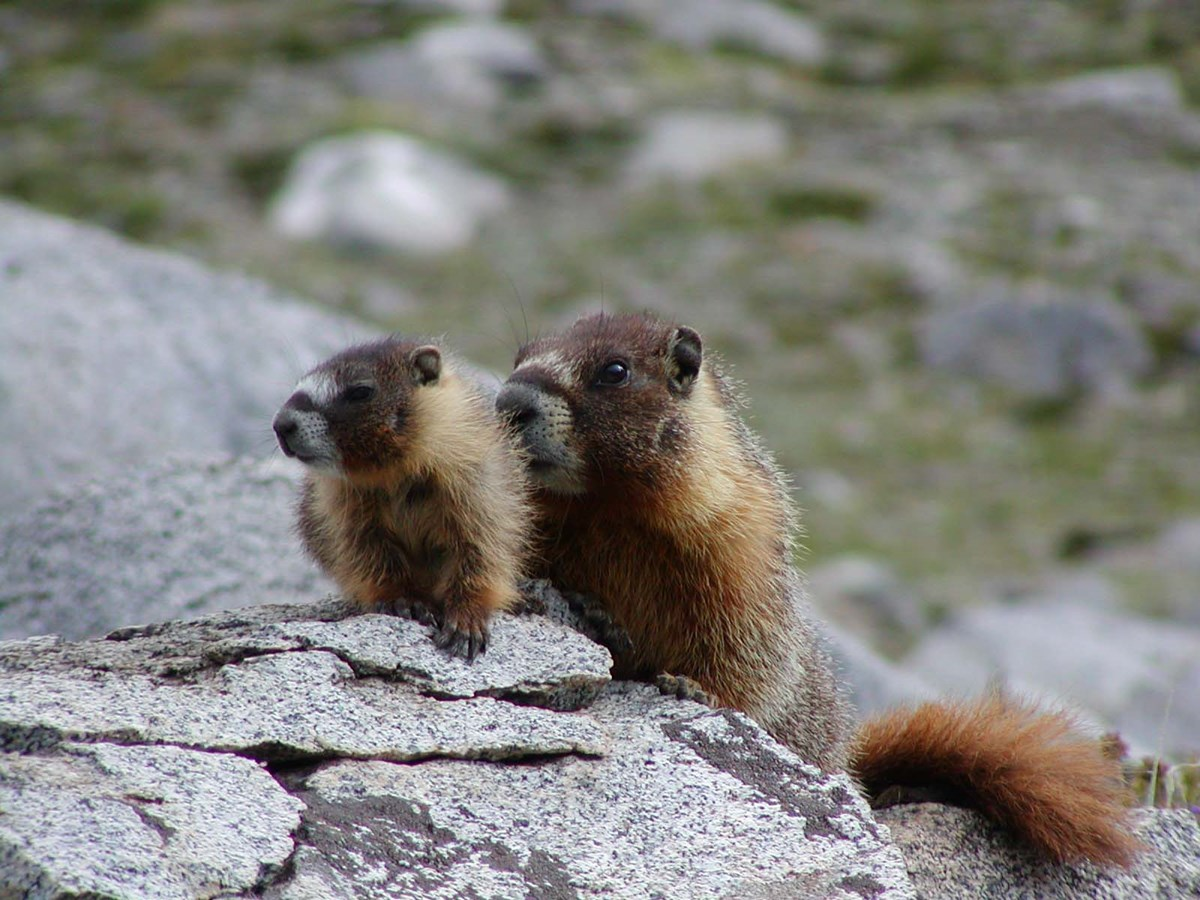

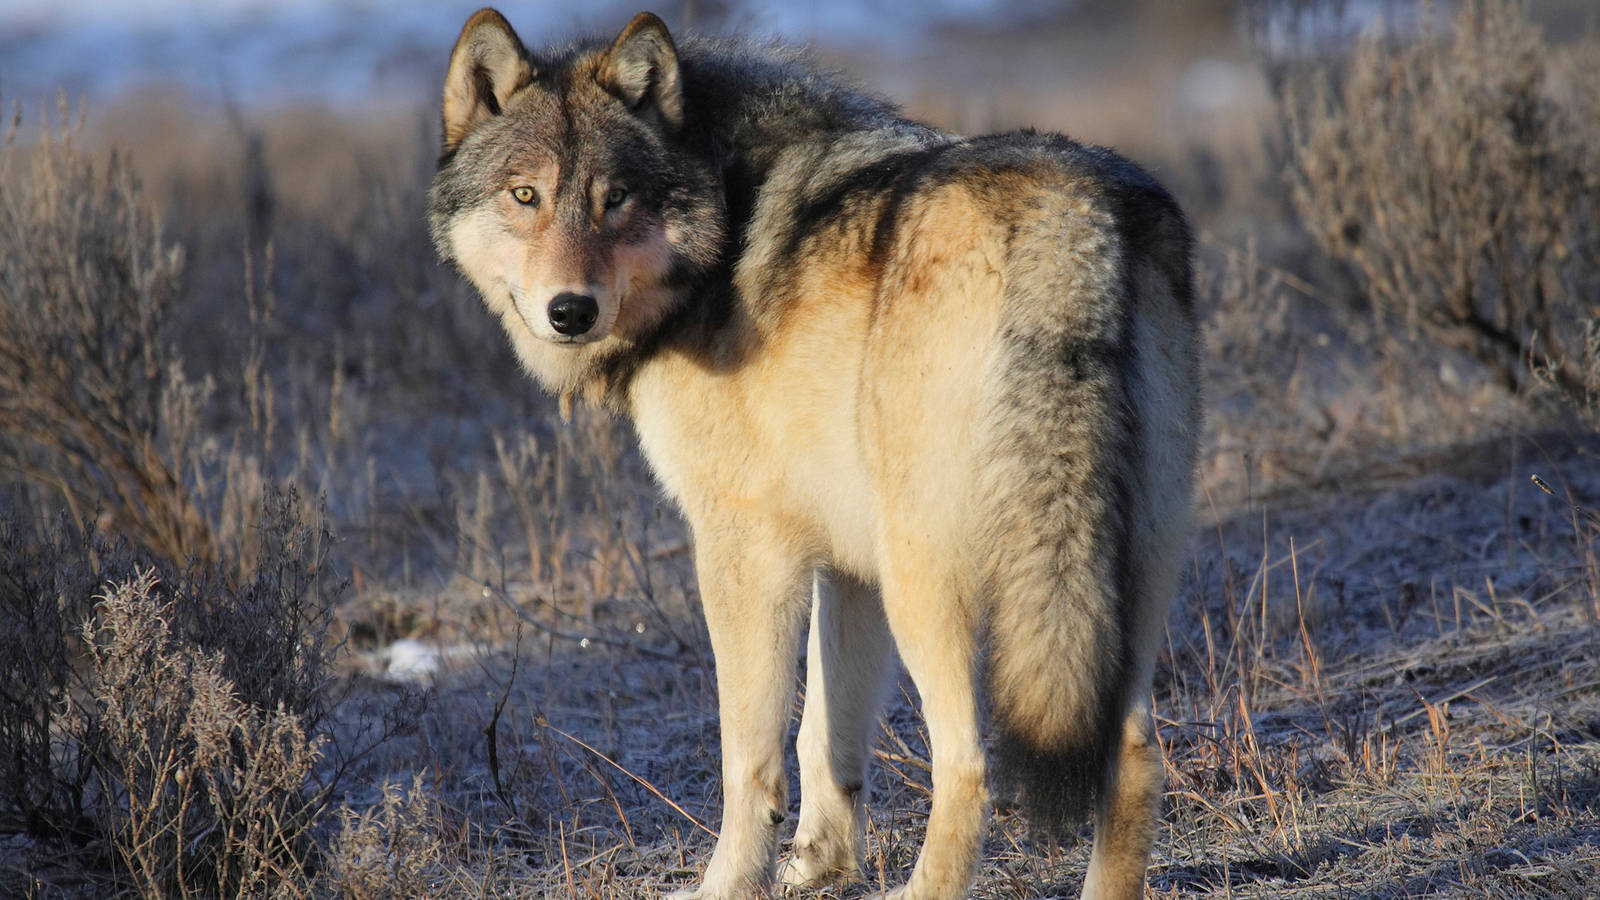

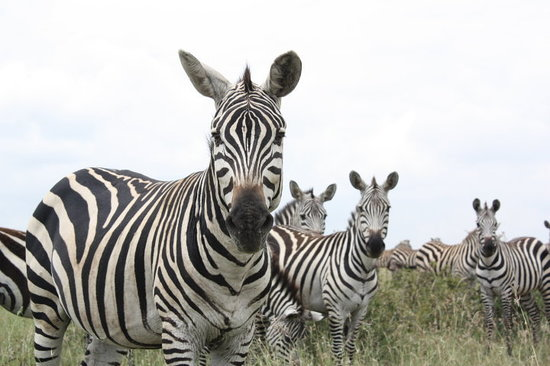

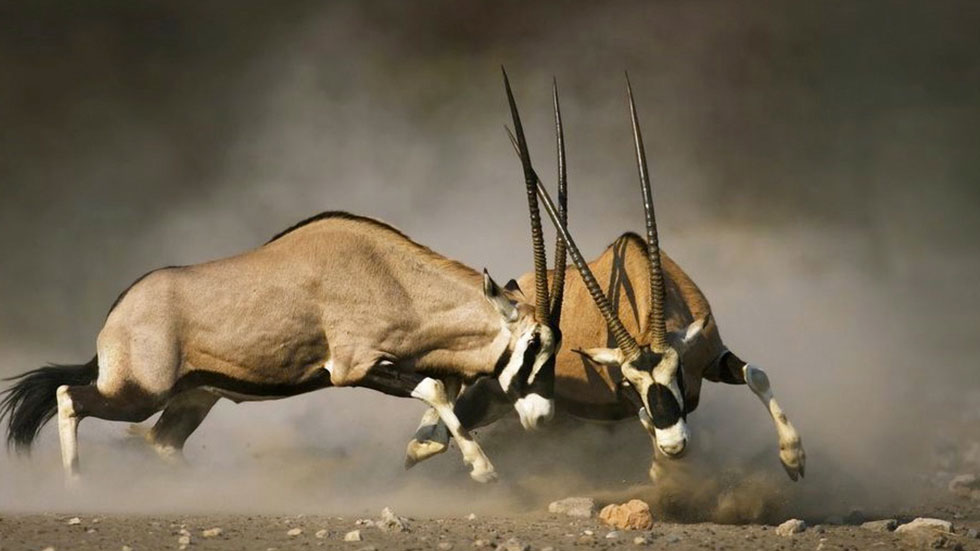

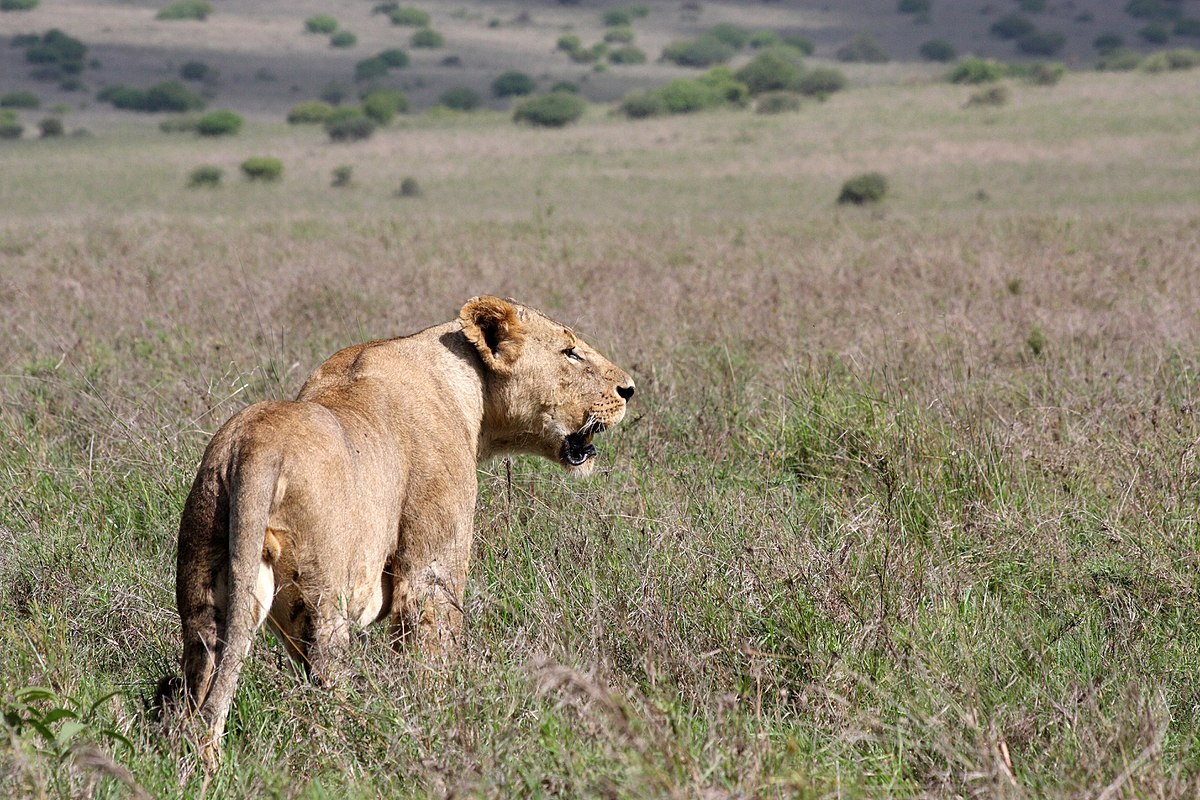

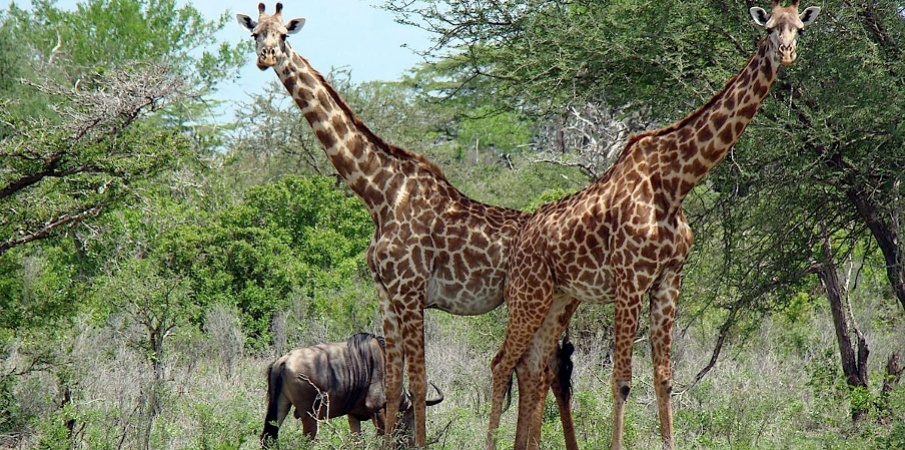

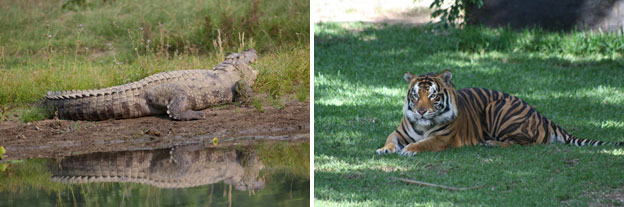

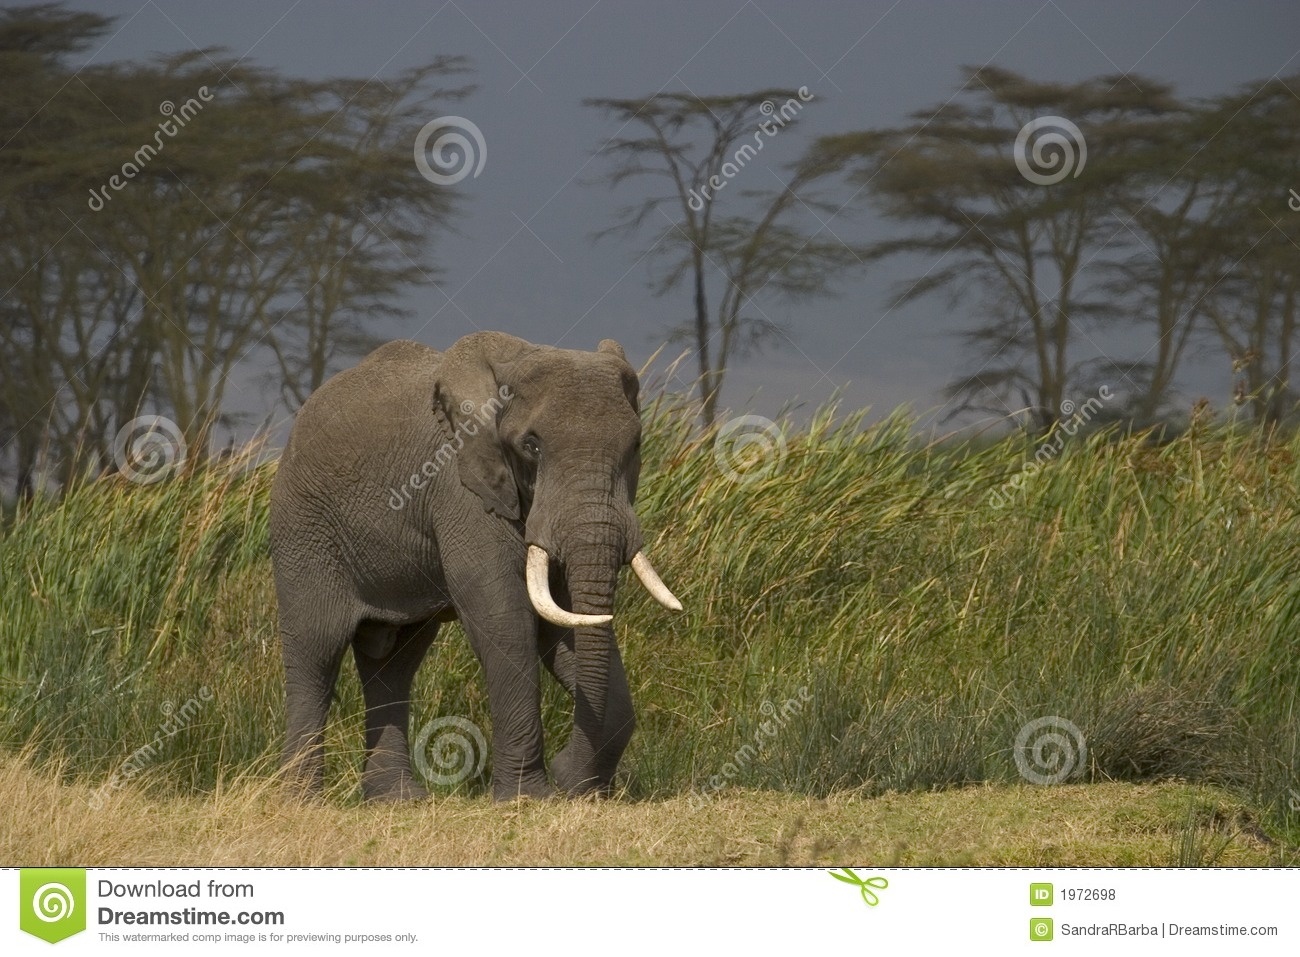

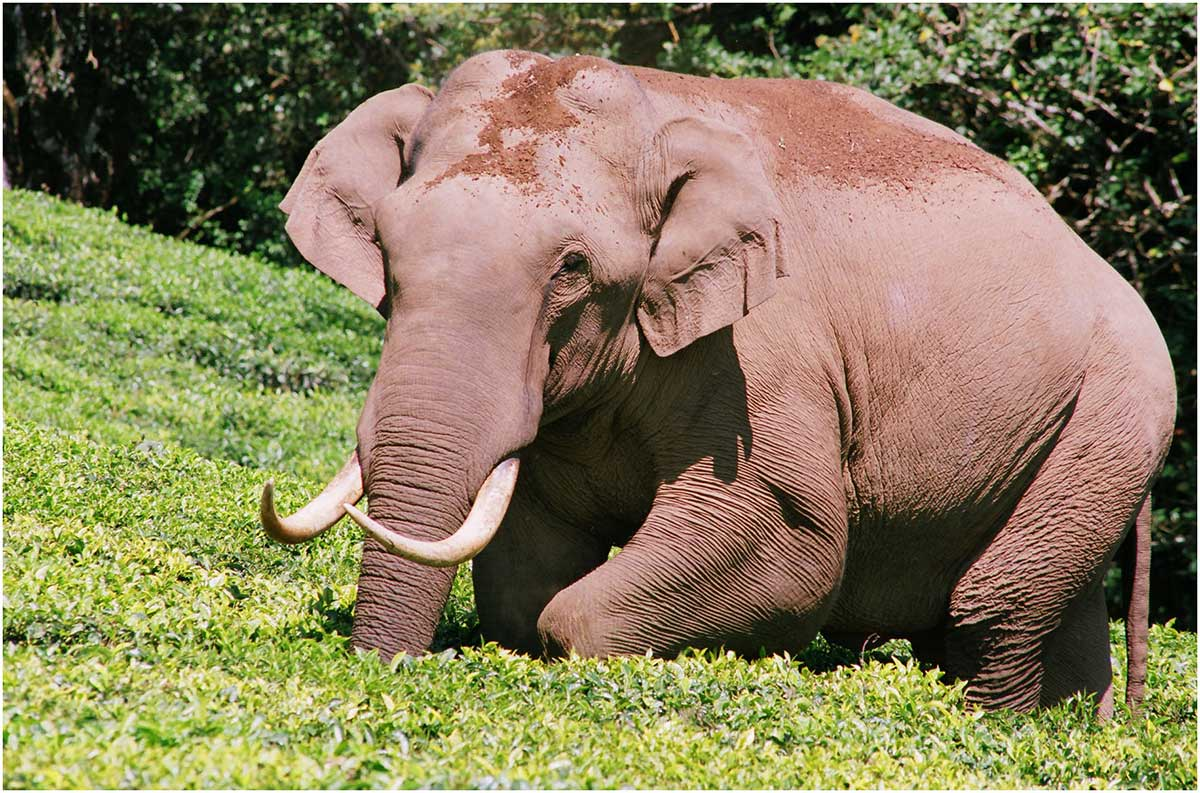

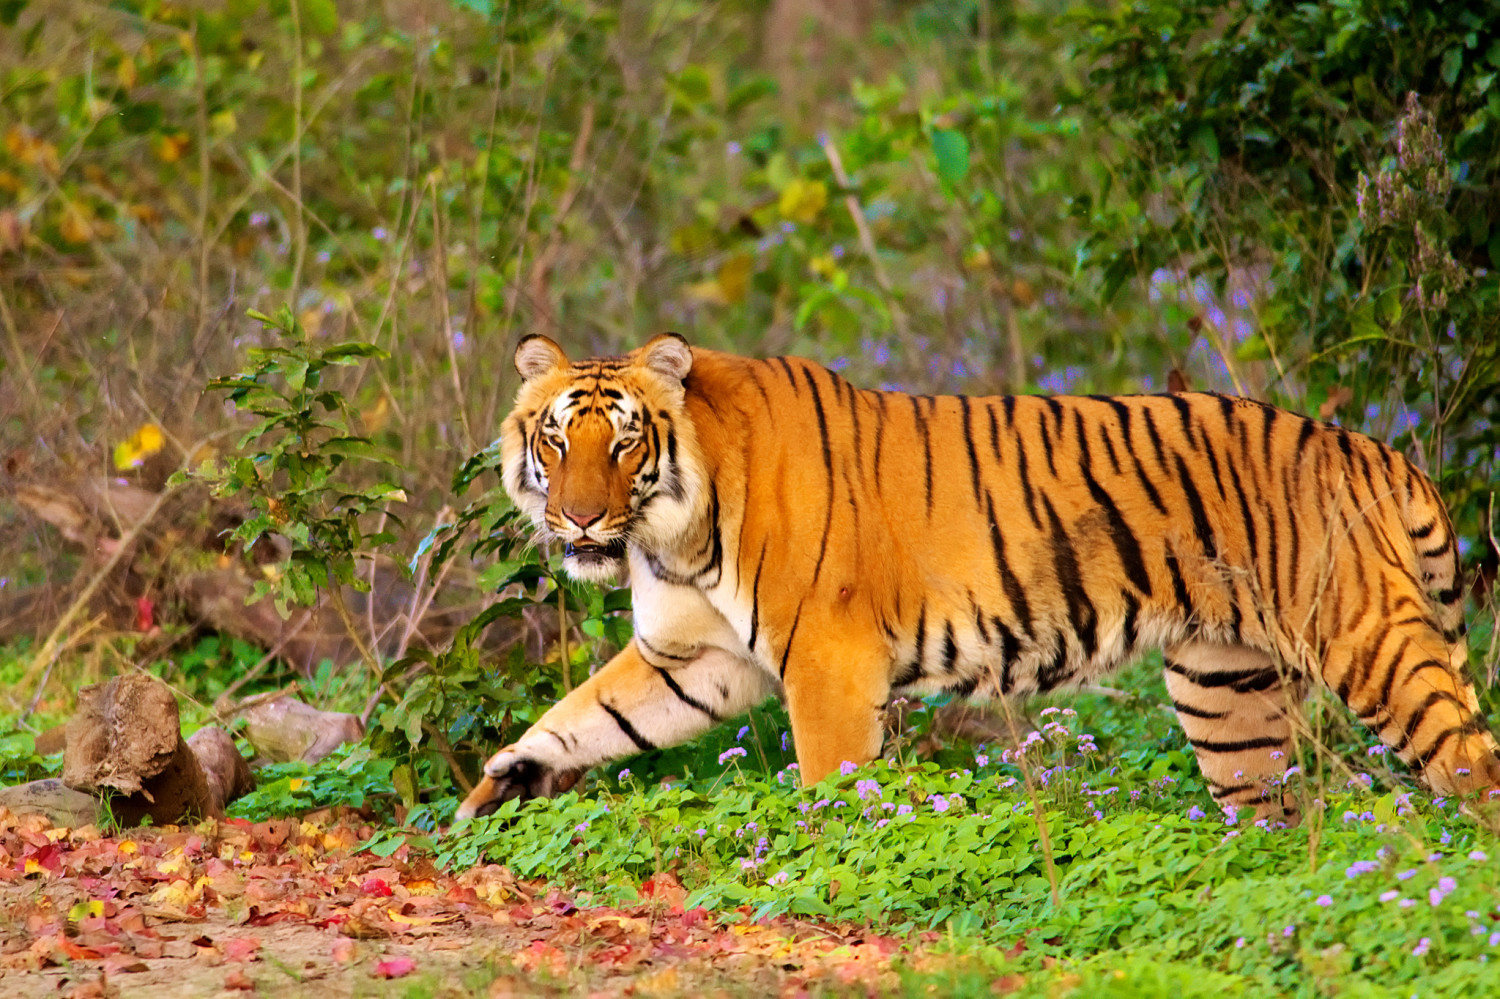

In [60]:
# View images

from IPython.display import Image

paths = []
for path in absolute_image_paths: 
  if type(path) == dict:
    for p in path['animal national park']:
      paths.append(p)
      
for i in paths:
  display(Image(i))

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [5]:
# Pre-trained model

PTModel = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 4s 0us/step


In [59]:
# Take an image instance, turn into an np array with float32,
# match the shape of the image to the shape of the pretrained model
# preprocess the data
# use pre trained model to classify image
# use use decode_predictions to eval perfomance

for path in paths:
  ImgPath = path
  Img = image.load_img(ImgPath, target_size=(224, 224))
  InputIMG = image.img_to_array(Img)
  InputIMG = np.expand_dims(InputIMG, axis=0)
  InputIMG = preprocess_input(InputIMG)
  PredData = PTModel.predict(InputIMG)
  print('Predicted:', decode_predictions(PredData, top=3)[0])

Predicted: [('n02128385', 'leopard', 0.8464764), ('n02128925', 'jaguar', 0.1442565), ('n02129604', 'tiger', 0.0047887983)]
Predicted: [('n02120505', 'grey_fox', 0.29400292), ('n02114367', 'timber_wolf', 0.11311486), ('n02114855', 'coyote', 0.10668613)]
Predicted: [('n03498962', 'hatchet', 0.17266525), ('n02415577', 'bighorn', 0.12721537), ('n01877812', 'wallaby', 0.069408)]
Predicted: [('n02410509', 'bison', 0.99975306), ('n07802026', 'hay', 0.00010129162), ('n02403003', 'ox', 5.7782574e-05)]
Predicted: [('n02423022', 'gazelle', 0.6626246), ('n02422699', 'impala', 0.13926797), ('n02422106', 'hartebeest', 0.11938093)]
Predicted: [('n02391049', 'zebra', 0.9979431), ('n02422106', 'hartebeest', 0.0002631924), ('n01798484', 'prairie_chicken', 0.00021379338)]
Predicted: [('n02129604', 'tiger', 0.8434663), ('n02123159', 'tiger_cat', 0.14193927), ('n02128925', 'jaguar', 0.0071617505)]
Predicted: [('n02504458', 'African_elephant', 0.9674866), ('n02408429', 'water_buffalo', 0.012640192), ('n0250

In [0]:
# module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
# height, width = hub.get_expected_image_size(module)
# images = ...  # A batch of images with shape [batch_size, height, width, 3].
# logits = module(images)  # Logits with shape [batch_size, num_classes].

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"